# Klasifikasi Gambar dengan CNN

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 182s 1us/step


In [3]:
print(type(x_train))
print(x_train.ndim)
print(x_train[0][0][0][0])
print(x_train[0][0][0])
print(x_train[0][0])
print(x_train[0])
print(x_train.shape)
print(x_test.shape)
# x_test, y_test = x_test
# print(f"Jumlah data train: {x_train.shape[0]}")
# print(f"Jumlah data test: {x_test.shape[0]}")

<class 'numpy.ndarray'>
4
59
[59 62 63]
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = models.Sequential()

In [7]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(layers.Flatten())

In [11]:
model.add(layers.Dense(64, activation='relu'))

In [12]:
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
%pip


Usage:   
  c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\python.exe -m pip <command> [options]

Commands:Note: you may need to restart the kernel to use updated packages.

  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  help                        Show help 

In [16]:
import tensorflow as tf
# Install tensorflow-directml
%pip install tensorflow-directml

# Import tensorflow-directml
tf.compat.v1.disable_eager_execution()

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7054 - loss: 0.8725
Test accuracy: 0.7077


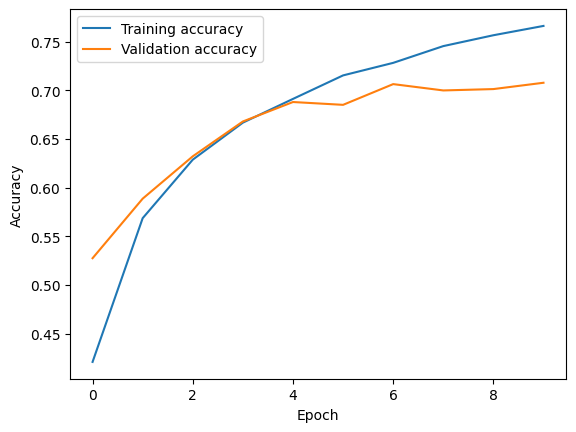

In [20]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

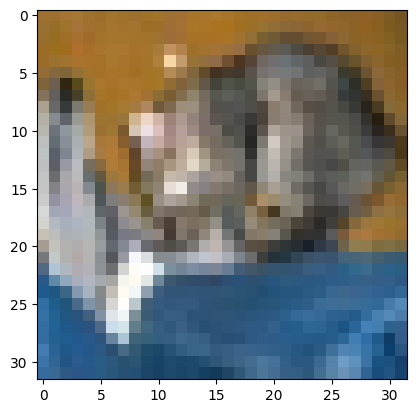

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted label: 3


In [23]:
import numpy as np

img = x_test[0]
plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=0)
predicted_class = model.predict(img)
predicted_label = np.argmax(predicted_class, axis=1)

print(f'Predicted label: {predicted_label[0]}')

Jika predicted label = 3 pada CIFAR-10, maka kategori gambar yang diprediksi adalah Cat (Kucing). Berikut urutan berdasarkan indexnya:
- 0: Airplane (Pesawat Terbang)
- 1: Automobile (Mobil)
- 2: Bird (Burung)
- 3: Cat (Kucing)
- 4: Deer (Rusa)
- 5: Dog (Anjing)
- 6: Frog (Katak)
- 7: Horse (Kuda)
- 8: Ship (Kapal)
- 9: Truck (Truk)